            Portfolio Optimization 

In [1]:
## Installing Packages

import pandas as pd
import numpy as np
import datetime as dt   
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr


In [2]:
#Time Interval & Stocks

start_date = '2020-01-01'
end_date = '2025-01-31'
tickers  = ['AAPL','MSFT','NVDA','AMZN','GOOGL','2222.SR','META','TSLA','AVGO','TSM']

In [3]:
#Data Download from Yahoo Finance. 
data = yf.download(tickers, start=start_date, end = end_date)['Close']
data.head()


[*********************100%***********************]  10 of 10 completed


Ticker,2222.SR,AAPL,AMZN,AVGO,GOOGL,META,MSFT,NVDA,TSLA,TSM
Date,,,,,,,,,,
2020-01-01,24.729422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,24.764650,72.796013,94.900497,27.986181,68.186813,208.981689,153.630722,5.972710,28.684000,54.504318
2020-01-03,NaN,72.088287,93.748497,27.274355,67.830116,207.875931,151.717728,5.877111,29.534000,52.706879
2020-01-05,24.341919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,24.306694,72.662712,95.143997,27.233549,69.638054,211.790985,152.109909,5.901758,30.102667,52.098648


In [4]:
#Replace the NaN values
data.ffill(inplace= True)
print(data.head())

Ticker        2222.SR       AAPL       AMZN       AVGO      GOOGL        META  \
Date                                                                            
2020-01-01  24.729422        NaN        NaN        NaN        NaN         NaN   
2020-01-02  24.764650  72.796013  94.900497  27.986181  68.186813  208.981689   
2020-01-03  24.764650  72.088287  93.748497  27.274355  67.830116  207.875931   
2020-01-05  24.341919  72.088287  93.748497  27.274355  67.830116  207.875931   
2020-01-06  24.306694  72.662712  95.143997  27.233549  69.638054  211.790985   

Ticker            MSFT      NVDA       TSLA        TSM  
Date                                                    
2020-01-01         NaN       NaN        NaN        NaN  
2020-01-02  153.630722  5.972710  28.684000  54.504318  
2020-01-03  151.717728  5.877111  29.534000  52.706879  
2020-01-05  151.717728  5.877111  29.534000  52.706879  
2020-01-06  152.109909  5.901758  30.102667  52.098648  


In [5]:
data.loc['2020-01-01'] = data.loc['2020-01-01'].fillna(0)
data.head()

Ticker,2222.SR,AAPL,AMZN,AVGO,GOOGL,META,MSFT,NVDA,TSLA,TSM
Date,,,,,,,,,,
2020-01-01,24.729422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,24.764650,72.796013,94.900497,27.986181,68.186813,208.981689,153.630722,5.972710,28.684000,54.504318
2020-01-03,24.764650,72.088287,93.748497,27.274355,67.830116,207.875931,151.717728,5.877111,29.534000,52.706879
2020-01-05,24.341919,72.088287,93.748497,27.274355,67.830116,207.875931,151.717728,5.877111,29.534000,52.706879
2020-01-06,24.306694,72.662712,95.143997,27.233549,69.638054,211.790985,152.109909,5.901758,30.102667,52.098648


In [6]:
data.describe()

Ticker,2222.SR,AAPL,AMZN,AVGO,GOOGL,META,MSFT,NVDA,TSLA,TSM
count,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,28.105299,153.801494,147.866164,73.420720,119.948034,305.541290,291.487117,40.104088,216.799002,104.382397
std,3.134442,43.287468,33.666544,49.885955,33.678422,131.000573,83.575317,39.959214,86.493388,38.700392
min,19.586267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.057238,128.003853,121.104752,42.419854,94.009209,209.380157,230.413815,13.631084,175.055000,81.292374
50%,27.760553,151.852791,154.467499,53.272636,120.038353,282.057556,278.739853,21.750430,221.139999,97.768787
75%,30.883164,179.177589,170.730003,87.898048,141.144829,352.187149,342.540466,46.728794,261.829987,115.543751
max,35.431919,259.019989,238.149994,249.331955,200.869995,687.000000,465.786438,149.429993,479.859985,224.619995


        Returns

            Daily Returns

In [7]:
daily_returns = data.pct_change().dropna()
daily_returns.head()

Ticker,2222.SR,AAPL,AMZN,AVGO,GOOGL,META,MSFT,NVDA,TSLA,TSM
Date,,,,,,,,,,
2020-01-02,0.001425,inf,inf,inf,inf,inf,inf,inf,inf,inf
2020-01-03,0.000000,-0.009722,-0.012139,-0.025435,-0.005231,-0.005291,-0.012452,-0.016006,0.029633,-0.032978
2020-01-05,-0.017070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-06,-0.001447,0.007968,0.014886,-0.001496,0.026654,0.018834,0.002585,0.004194,0.019255,-0.011540
2020-01-07,-0.004348,-0.004703,0.002092,-0.003443,-0.001932,0.002164,-0.009118,0.012107,0.038801,0.016205


In [8]:
daily_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
daily_returns.dropna(inplace=True)
daily_returns.head()

Ticker,2222.SR,AAPL,AMZN,AVGO,GOOGL,META,MSFT,NVDA,TSLA,TSM
Date,,,,,,,,,,
2020-01-03,0.000000,-0.009722,-0.012139,-0.025435,-0.005231,-0.005291,-0.012452,-0.016006,0.029633,-0.032978
2020-01-05,-0.017070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-06,-0.001447,0.007968,0.014886,-0.001496,0.026654,0.018834,0.002585,0.004194,0.019255,-0.011540
2020-01-07,-0.004348,-0.004703,0.002092,-0.003443,-0.001932,0.002164,-0.009118,0.012107,0.038801,0.016205
2020-01-08,-0.004367,0.016086,-0.007809,-0.012474,0.007118,0.010138,0.015928,0.001876,0.049205,0.007373


            Expected annualized Returns and Annualized Cov Matrix
            

In [9]:
expected_returns = daily_returns.mean()*252  
cov_matrix = daily_returns.cov()*252


In [10]:
#Function to calculate portfolio return

def portfolio_return(weights):
    return np.dot(weights, expected_returns)

In [12]:
#Function to calculate portfolio volatility
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [13]:
from scipy.optimize import minimize

Optimal Weights: 
AAPL: 0.0613
MSFT: 0.0000
NVDA: 0.0000
AMZN: 0.1981
GOOGL: 0.0000
2222.SR: 0.0000
META: 0.0000
TSLA: 0.4981
AVGO: 0.2426
TSM: 0.0000

Expected Portfolio Performance: 53.16%
Expected Portfolio Volatility: 39.49%
Optimal Sharpe Ratio:  132.08%


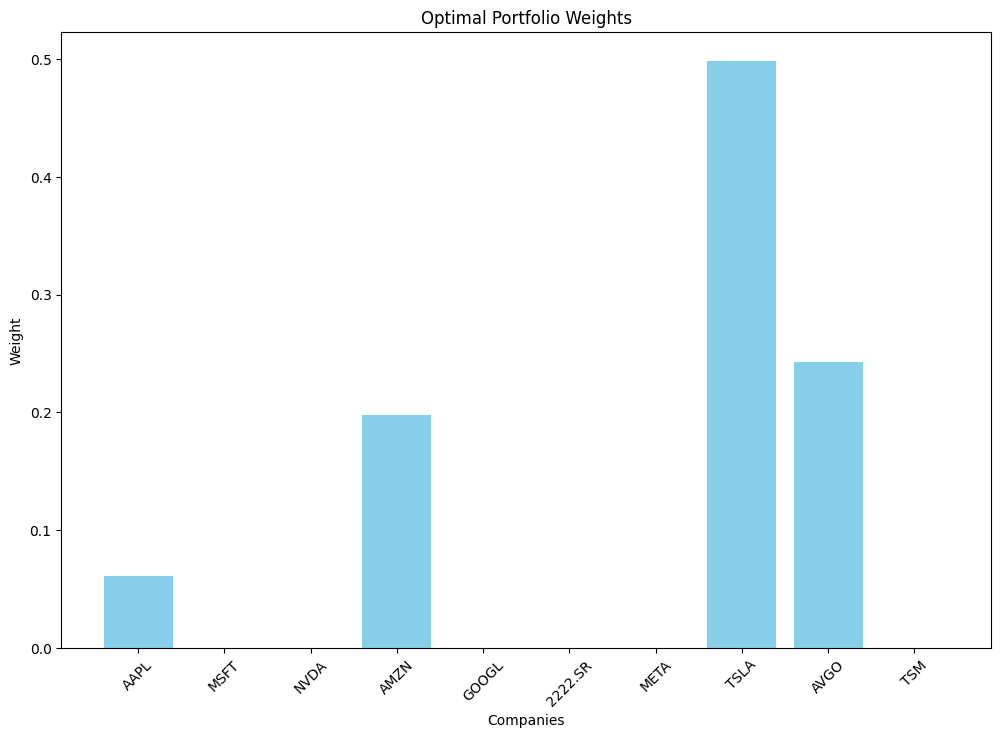

In [14]:
#Objective Function: Minimize Sharpe Ratio 
#assuming 10% risk free rate

def negative_sharpe_ratio(weights, risk_free_rate =0.01):
    port_return = portfolio_return(weights) 
    port_volatility = portfolio_volatility(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return - sharpe_ratio #negative to maximize 


#restriction N° 1: Weights must add up to a total of 1
def constraint(weights):
    return np.sum(weights) - 1

#Border: Weights must be between 0 and 1 [0,1]
bounds = tuple((0,1) for _ in range(len(tickers)))

#Initial weights: equal weight, i.e., 1/10: 0.1

initial_weights = np.array([1/len(tickers)]* len(tickers))

#Restriction settings
constraints = ({'type': 'eq', 'fun': constraint})


#optimization
optimized = minimize(
    negative_sharpe_ratio,
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

#Optimization Result
optimal_weights = optimized.x
optimal_return = portfolio_return(optimal_weights)
optimal_volatility = portfolio_volatility(optimal_weights)
optimal_sharpe = (optimal_return -0.01) / optimal_volatility

#Show Results
print("Optimal Weights: ")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")
print(f"\nExpected Portfolio Performance: {optimal_return:.2%}")
print(f"Expected Portfolio Volatility: {optimal_volatility:.2%}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe: .2%}")

#Optimal Portfolio: Graphshow Results
plt.figure(figsize=(12,8))
plt.bar(tickers, optimal_weights, color = 'skyblue')
plt.title("Optimal Portfolio Weights")
plt.ylabel("Weight")
plt.xlabel("Companies")
plt.xticks(rotation = 45)
plt.show()


        Now, let's addd restrictions:

                A. Invest at least 5% in each company
                B. Invest at least 5% and maximum 20% in each company



            A.

Optimal Weights: 
AAPL: 0.0500
MSFT: 0.0500
NVDA: 0.0500
AMZN: 0.0850
GOOGL: 0.0500
2222.SR: 0.0500
META: 0.0500
TSLA: 0.3701
AVGO: 0.1949
TSM: 0.0500

Expected Portfolio Performance: 44.87%
Expected Portfolio Volatility: 34.60%
Optimal Sharpe Ratio:  126.81%


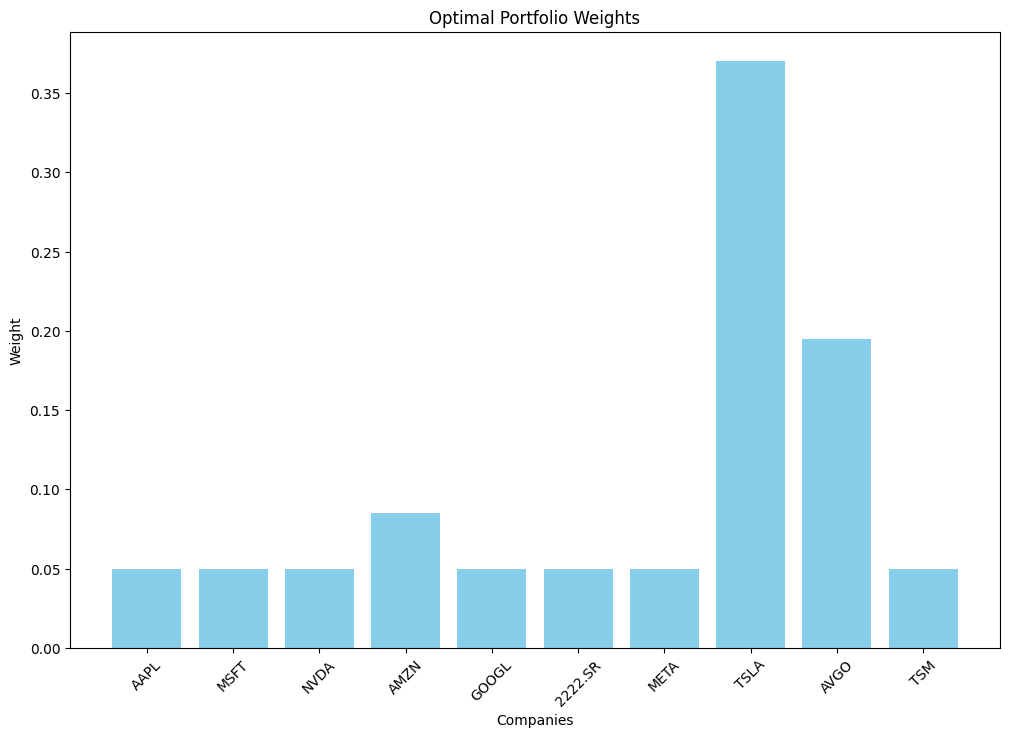

In [16]:
#Objective Function: Minimize Sharpe Ratio 
#assuming 10% risk free rate

def negative_sharpe_ratio(weights, risk_free_rate =0.01):
    port_return = portfolio_return(weights) 
    port_volatility = portfolio_volatility(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return - sharpe_ratio #negative to maximize 


#restriction N° 1: Weights must add up to a total of 1
def constraint(weights):
    return np.sum(weights) - 1

#Border: Weights must be between 0 and 1 [0,1]
bounds = tuple((0.05,1) for _ in range(len(tickers)))

#Initial weights: equal weight, i.e., 1/10: 0.1

initial_weights = np.array([1/len(tickers)]* len(tickers))

#Restriction settings
constraints = ({'type': 'eq', 'fun': constraint})


#optimization
optimized = minimize(
    negative_sharpe_ratio,
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

#Optimization Result
optimal_weights = optimized.x
optimal_return = portfolio_return(optimal_weights)
optimal_volatility = portfolio_volatility(optimal_weights)
optimal_sharpe = (optimal_return -0.01) / optimal_volatility

#Show Results
print("Optimal Weights: ")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")
print(f"\nExpected Portfolio Performance: {optimal_return:.2%}")
print(f"Expected Portfolio Volatility: {optimal_volatility:.2%}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe: .2%}")

#Optimal Portfolio: Graphshow Results
plt.figure(figsize=(12,8))
plt.bar(tickers, optimal_weights, color = 'skyblue')
plt.title("Optimal Portfolio Weights")
plt.ylabel("Weight")
plt.xlabel("Companies")
plt.xticks(rotation = 45)
plt.show()


            B. 

Optimal Weights: 
AAPL: 0.1000
MSFT: 0.0500
NVDA: 0.0500
AMZN: 0.2000
GOOGL: 0.0500
2222.SR: 0.0500
META: 0.0500
TSLA: 0.2000
AVGO: 0.2000
TSM: 0.0500

Expected Portfolio Performance: 39.59%
Expected Portfolio Volatility: 30.92%
Optimal Sharpe Ratio:  124.83%


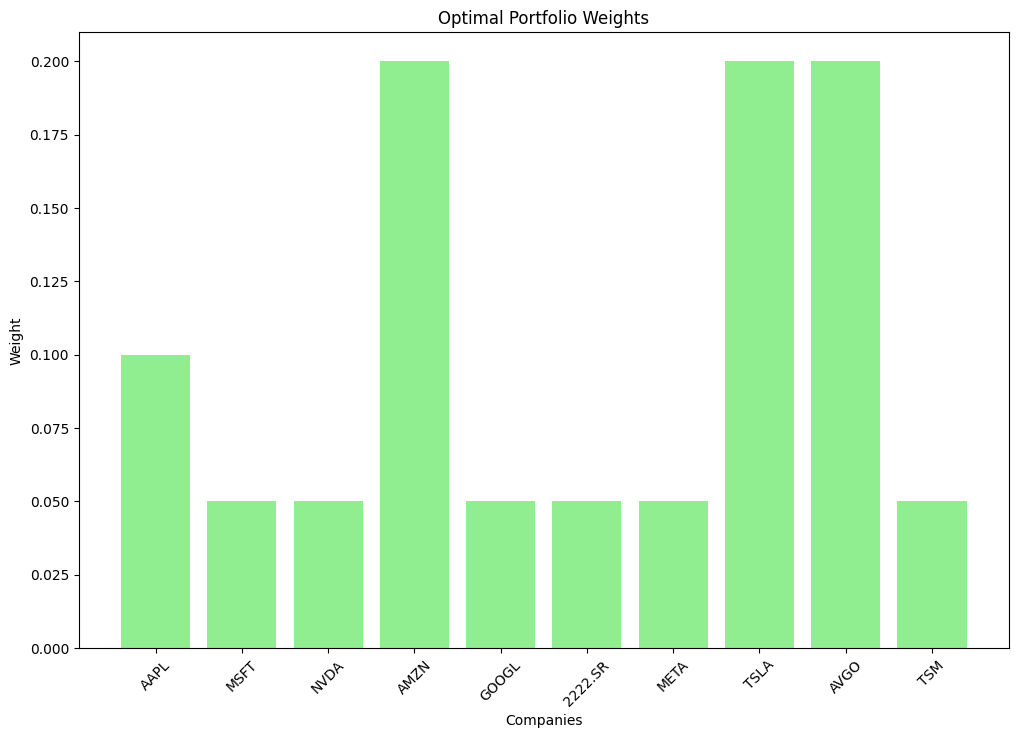

In [19]:
#Objective Function: Minimize Sharpe Ratio 
#assuming 10% risk free rate

def negative_sharpe_ratio(weights, risk_free_rate =0.01):
    port_return = portfolio_return(weights) 
    port_volatility = portfolio_volatility(weights)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return - sharpe_ratio #negative to maximize 


#restriction N° 1: Weights must add up to a total of 1
def constraint(weights):
    return np.sum(weights) - 1

#Border: Weights must be between 0 and 1 [0,1]
bounds = tuple((0.05,0.20) for _ in range(len(tickers)))

#Initial weights: equal weight, i.e., 1/10: 0.1

initial_weights = np.array([1/len(tickers)]* len(tickers))

#Restriction settings
constraints = ({'type': 'eq', 'fun': constraint})


#optimization
optimized = minimize(
    negative_sharpe_ratio,
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

#Optimization Result
optimal_weights = optimized.x
optimal_return = portfolio_return(optimal_weights)
optimal_volatility = portfolio_volatility(optimal_weights)
optimal_sharpe = (optimal_return -0.01) / optimal_volatility

#Show Results
print("Optimal Weights: ")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")
print(f"\nExpected Portfolio Performance: {optimal_return:.2%}")
print(f"Expected Portfolio Volatility: {optimal_volatility:.2%}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe: .2%}")

#Optimal Portfolio: Graphshow Results
plt.figure(figsize=(12,8))
plt.bar(tickers, optimal_weights, color = 'lightgreen')
plt.title("Optimal Portfolio Weights")
plt.ylabel("Weight")
plt.xlabel("Companies")
plt.xticks(rotation = 45)
plt.show()